In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, Excel file I/O (e.g. pd.read_excel)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', 50)
pd.options.display.max_rows = 999

In [2]:
df_matrix_for_cluster = pd.read_csv('./matrix_for_cluster.csv')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

Silhouetter Score: 0.314584970405888 with number of clusters equal to 2
Silhouetter Score: 0.2586771182888084 with number of clusters equal to 3
Silhouetter Score: 0.11578495772182328 with number of clusters equal to 4
Silhouetter Score: 0.12483390989048923 with number of clusters equal to 5
Silhouetter Score: 0.11375879871047291 with number of clusters equal to 6
Silhouetter Score: 0.10553696600486101 with number of clusters equal to 7
Silhouetter Score: 0.09683389265727167 with number of clusters equal to 8
Silhouetter Score: 0.11088797562803616 with number of clusters equal to 9


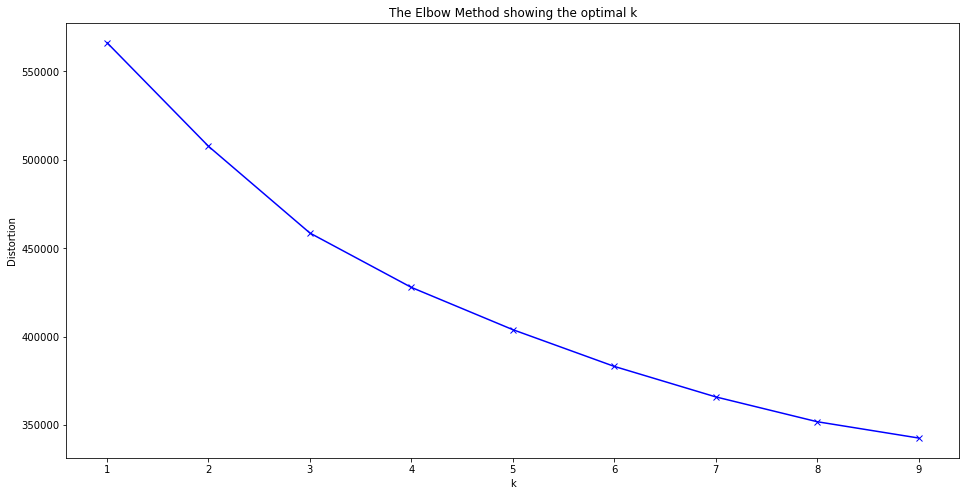

In [3]:
#k-mean clustering to determine how many groups of countries that have similiar health outcome

#normalize datatset before doing K-mean
x = df_matrix_for_cluster
standard_scaler = preprocessing.StandardScaler()
x_scaled = standard_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df_normalized.columns = df_matrix_for_cluster.columns
df_kmeans = df_normalized

distortions = []


K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_kmeans)
    distortions.append(kmeanModel.inertia_)
    # Calculate Silhoutte Score
    if (k != 1):
        cluster_labels = kmeanModel.fit_predict(df_kmeans)
        score = silhouette_score(df_kmeans, cluster_labels)
        print("Silhouetter Score: " + str(score) + " with number of clusters equal to " + str(k))
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()





In [14]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df_kmeans, 3)
kmeans = pd.DataFrame(clust_labels)
print(kmeans)
wh1.insert((wh1.shape[1]),'kmeans',kmeans)

#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Trust..Government.Corruption.'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

       0
0      0
1      0
2      2
3      0
4      0
...   ..
12863  2
12864  2
12865  2
12866  2
12867  2

[12868 rows x 1 columns]


NameError: name 'wh1' is not defined

In [3]:
#Demographics data imported for Hypothesis: 5 and 6
#C:/Users/fuhoi/OneDrive/Documents/healthcare
#df_demo = pd.read_csv('C:/Users/fuhoi/OneDrive/Documents/healthcare/patient_demographics.csv')    
df_demo = pd.read_csv('./patient_demographics.csv')
df_geog = pd.read_csv('./patient_geography.csv')
df_cancel_mem = pd.read_csv('./cancels_membership.csv')
df_renew_mem = pd.read_csv('./renews_membership.csv')
df_single_buy = pd.read_csv('./single_service_buys_something.csv')
df_all_buy  = pd.read_csv('./all_service_buys_something.csv')
df_single_appoint = pd.read_csv('./SingleServiceAppointment.csv')
df_all_appoint  = pd.read_csv('./AllServiceAppointment.csv')
df_social = pd.read_csv('./SocialSupport.csv')
df_demo.head()

,Unnamed: 0,Patient ID,Sex,YearBirth,Marital status,Ocupacion
0,0,1,H,1928.0,SOLTERÍA,ALBAÑIL
1,1,2,H,1971.0,MATRIMONIO,INSTALACION MECANICA
2,2,3,M,1943.0,MATRIMONIO,HOGAR
3,3,4,H,1976.0,SOLTERÍA,EMPLEADO
4,4,5,H,1958.0,MATRIMONIO,CASADO


In [4]:
#Testing Hpyothesis 1 from Group 2

#Commitment contract that mentions more family or loved ones will tend to have higher retention rates.

#Testing social emotional support vs renew membership
df_demo_social = pd.merge(df_demo, df_social, left_on='Patient ID',right_on='IdPaciente', how="left")

#if ApoyoSocialEmocional is equal to 1, have support. Else it is 0 (false)
df_demo_social['emotion_support'] = df_demo_social['ApoyoSocialEmocional'] == 1

#Merge with renew membership table
df_demo_social_remem = pd.merge(df_demo_social, df_renew_mem, left_on='Patient ID',right_on='IdPaciente', how="right")

#Testing emotional support vs renew memembership
print("Emotional support vs Renew Membership")
print(df_demo_social_remem.groupby(['emotion_support', 'value'])['value'].count().sort_values(ascending=False))

#Observation and Conclusion: For patients with emotional support, 95.47% would renew their membership.
#For patient without emotional support, 85.64% would renew their membership.

#It is verified that patients with emotional support will tend to have higher retention rates.

Emotional support vs Renew Membership
emotion_support  value
True             1.0      27863
False            1.0      14122
                 0.0       2367
True             0.0       1321
Name: value, dtype: int64


In [5]:
#Testing Hpyothesis 2 from Group 2
#Patients who need more clinical attention (either more time in clinic or referral to 
#specialists) are more likely to stay engaged.

#Duration from Single Service Appointment.
df_single_appoint.head()

df_single_appoint['time_diff'] = pd.to_datetime(df_single_appoint['HoraSalida']) - pd.to_datetime(df_single_appoint['HoraEntrada'])




In [8]:
df_single_appoint_agg = df_single_appoint.groupby(['IdPaciente'])['time_diff'].agg(['sum'])
df_single_appoint_agg['hour'] = df_single_appoint_agg['sum'] / pd.Timedelta('1 hour')

#Assume high clinical attention means 6 hours aggregated in the clinic. 
df_single_appoint_agg['More time in clinic'] = df_single_appoint_agg['hour'] >= 6

df_single_appoint_remem = pd.merge(df_single_appoint_agg, df_renew_mem, left_on='IdPaciente',right_on='IdPaciente', how="right")

#Testing more clinical attention vs renew memembership
print("more clinical attention vs Renew Membership")
print(df_single_appoint_remem.groupby(['More time in clinic', 'value'])['value'].count().sort_values(ascending=False))

#For patients  who have more time in clinic, 98.41% of them renew their membership at least for once.

#For patients  who DONT have more time in clinic, 94.46% of them renew their membership at least for once.

#Conclusion: There are no significant difference between the two group of patients. 

more clinical attention vs Renew Membership
More time in clinic  value
False                1.0      24039
True                 1.0      15169
False                0.0       1408
True                 0.0        245
Name: value, dtype: int64


In [7]:
df_geog.head()

,Unnamed: 0,Patient ID,Town,State,Branch id
0,0,1,GUADALUPE,NUEVO LEÓN,1
1,1,2,GUADALUPE,NUEVO LEÓN,1
2,2,3,GUADALUPE,NUEVO LEÓN,1
3,3,4,SANTIAGO,NUEVO LEÓN,1
4,4,5,GUADALUPE,NUEVO LEÓN,1


In [10]:
#Testing Hpyothesis 3 from Group 2
#Patients will be likely to have higher engagement if they live in same city as their clinic.

#Town and Branch
df_geog_sin_buy = pd.merge(df_geog, df_single_buy, left_on='Patient ID',right_on='IdPaciente', how="right")
df_geog_all_buy = pd.merge(df_geog, df_all_buy, left_on='Patient ID',right_on='IdPaciente', how="right")

print("Town and branch vs single Service buy")
print(df_geog_sin_buy.groupby(['Town','Branch id','value'])['value'].count().sort_values(ascending=False)[0:20])

print("Town and branchvs all service buy")
print(df_geog_all_buy.groupby(['Town','Branch id' ,'value'])['value'].count().sort_values(ascending=False)[0:20])


#Indirect test of the hypothesis - is there only 1-1 mapping from patient's town to Branch ID.
#We cannot draw any conclusion whether patients will be likely to have higher engagement 
#if they live in same city as their clinic.

Town and branch vs single Service buy
Town                      Branch id  value
GUADALUPE                 1.0        0.0      1921
                                     1.0      1586
MONTERREY                 4.0        1.0      1070
                          5.0        1.0      1066
SANTA CATARINA            2.0        0.0      1028
                                     1.0       688
MONTERREY                 4.0        0.0       666
                          5.0        0.0       656
                          1.0        0.0       646
APODACA                   6.0        1.0       590
MONTERREY                 1.0        1.0       520
GENERAL ESCOBEDO          3.0        0.0       458
ESCOBEDO                  3.0        0.0       403
APODACA                   1.0        1.0       392
                                     0.0       374
GENERAL ESCOBEDO          3.0        1.0       351
APODACA                   6.0        0.0       351
SAN NICOLÁS DE LOS GARZA  1.0        1.0       345
J

In [34]:
#Testing Hpyothesis 4 from Group 2
#Patients with indicators of higher wealth (expensive neighborhoods, high paying jobs)
#will be more likely to engage and renew.


#Testing Occupation vs Single Service Appontment
df_demo_can_mem = pd.merge(df_demo, df_cancel_mem, left_on='Patient ID',right_on='IdPaciente', how="right")
df_demo_re_mem = pd.merge(df_demo, df_renew_mem, left_on='Patient ID',right_on='IdPaciente', how="right")
df_demo_sin_buy = pd.merge(df_demo, df_single_buy, left_on='Patient ID',right_on='IdPaciente', how="right")
df_demo_all_buy = pd.merge(df_demo, df_all_buy, left_on='Patient ID',right_on='IdPaciente', how="right")

print("Testing Occupation vs Single Service Appontment")
print(df_demo_sin_buy.groupby(['Ocupacion', 'value'])['value'].count().sort_values(ascending=False)[0:15])


print("Testing Occupation vs All Service Appontment")
print(df_demo_all_buy.groupby(['Ocupacion', 'value'])['value'].count().sort_values(ascending=False)[0:15])

print("Testing Occupation vs Cancelled Membership")
print(df_demo_re_mem.groupby(['Ocupacion', 'value'])['value'].count().sort_values(ascending=False)[0:15])

#Comments: Pensioner(PENSIONADO) vs Non-Pensioner: Pensioner is more likely to buy single service/all service appointment
#          DESEMPLEADO(Unemployed): 

Testing Occupation vs Single Service Appontment
Ocupacion      value
EMPLEADO       0.0      4186
HOGAR          1.0      4015
EMPLEADO       1.0      3760
HOGAR          0.0      3535
INDEPENDIENTE  1.0      1252
PENSIONADO     1.0      1186
INDEPENDIENTE  0.0      1136
PENSIONADO     0.0       795
DESEMPLEADO    0.0       277
               1.0       187
COMERCIANTE    0.0        82
EMPLEADA       0.0        40
VENTAS         0.0        22
JUBILADO       0.0        22
ESTUDIANTE     0.0        18
Name: value, dtype: int64
Testing Occupation vs All Service Appontment
Ocupacion      value
EMPLEADO       0.0      3661
               1.0      3536
HOGAR          0.0      3264
               1.0      3125
INDEPENDIENTE  1.0      1185
               0.0       942
PENSIONADO     1.0       804
               0.0       746
DESEMPLEADO    0.0       252
               1.0       177
COMERCIANTE    0.0        81
EMPLEADA       0.0        40
VENTAS         0.0        20
JUBILADO       0.0        1

In [11]:
#Testing Hpyothesis 5 from Group 2
#Patients under age 40 are more likely to have higher engagement than older patients.

df_demo['Age'] = 2021 - df_demo['YearBirth']
df_demo['Age < 40'] = df_demo['Age'] < 40
# merging df1 and df2 with merge function 
df_demo_can_mem = pd.merge(df_demo, df_cancel_mem, left_on='Patient ID',right_on='IdPaciente', how="right")
df_demo_re_mem = pd.merge(df_demo, df_renew_mem, left_on='Patient ID',right_on='IdPaciente', how="right")

#Testing age vs cancellation memembership
print("Age < 40 vs Cancel Membership")
print(df_demo_can_mem.groupby(['Age < 40', 'value'])['value'].count().sort_values(ascending=False))
#Comments: For patients with age >= 40, 85.64% of them will cancel. For patients with age < 40, 83.11% of them will cancel.


#Testing age vs renew memembership
print("Age < 40 vs Renew Membership")
print(df_demo_re_mem.groupby(['Age < 40', 'value'])['value'].count().sort_values(ascending=False))

#Comments: For patients with age >= 40, 91.77% of them will renew. For patients with age < 40, 88.26% of them will renew.

#Observation and conclusion: There is no signfiance difference/correlation between age < 40 and patient engagement.

Age < 40 vs Cancel Membership
Age < 40  value
False     1.0      34723
          0.0       5853
True      1.0       2391
          0.0        486
Name: value, dtype: int64
Age < 40 vs Renew Membership
Age < 40  value
False     1.0      37758
          0.0       3387
True      1.0       2143
          0.0        285
Name: value, dtype: int64


In [12]:
xls = pd.ExcelFile('./Balance1.xlsx')
df_pacientes = pd.read_excel(xls, 'pacientes')


In [13]:
#Testing Hpyothesis 6 from Group 2
#Educated patients will be more likely to have higher engagement.
df_pacientes_school = df_pacientes[['IdPaciente','Escolaridad']]
df_pacientes_school = df_pacientes_school.dropna()

df_pacientes_sin_buy = pd.merge(df_pacientes_school, df_single_buy, left_on='IdPaciente',right_on='IdPaciente', how="right")
df_pacientes_all_buy = pd.merge(df_pacientes_school, df_all_buy, left_on='IdPaciente',right_on='IdPaciente', how="right")

print("Town and branch vs single Service buy")
print(df_pacientes_sin_buy.groupby(['Escolaridad','value'])['value'].count().sort_values(ascending=False)[0:15])

print("Town and branchvs all service buy")
print(df_pacientes_all_buy.groupby(['Escolaridad','value'])['value'].count().sort_values(ascending=False)[0:15])

#Merge with renew membership table
df_pacientes_social_remem = pd.merge(df_pacientes_school, df_renew_mem, left_on='IdPaciente',right_on='IdPaciente', how="right")

#Testing emotional support vs renew memembership
print("Education Level vs Renew Membership")
print(df_pacientes_social_remem.groupby(['Escolaridad', 'value'])['value'].count().sort_values(ascending=False))

#No signficance difference between patients with secondary and bacelor degree
#Somewhat higher difference for master degree (MAESTRIA) on single service buy (56%) and all service buy(56%).
#Patient with PREPARATORY education tend NOT to buy single service (58%)/all service(64%)

#It can be concluded that Educated patients will be more likely to have higher engagement.

Town and branch vs single Service buy
Escolaridad      value
PREPARATORIA     0.0      1023
SECUNDARIA       0.0       974
PRIMARIA         0.0       866
                 1.0       777
LICENCIATURA     0.0       742
PREPARATORIA     1.0       732
LICENCIATURA     1.0       729
SECUNDARIA       1.0       606
MAESTRIA         1.0       115
LEER Y ESCRIBIR  0.0       107
MAESTRIA         0.0        90
LEER Y ESCRIBIR  1.0        80
NINGUNA          0.0        68
                 1.0        32
DOCTORADO        0.0        13
Name: value, dtype: int64
Town and branchvs all service buy
Escolaridad      value
PREPARATORIA     0.0      985
SECUNDARIA       0.0      917
PRIMARIA         0.0      828
LICENCIATURA     0.0      698
                 1.0      598
PREPARATORIA     1.0      563
PRIMARIA         1.0      550
SECUNDARIA       1.0      538
LEER Y ESCRIBIR  0.0      104
MAESTRIA         1.0      102
                 0.0       80
NINGUNA          0.0       62
LEER Y ESCRIBIR  1.0       54
N

In [36]:
#Testing Hpyothesis 7 from Group 2
#Patients with close family members who are engaged at that clinic will be more likely to
#have high engagement.

#There is no available data for testing this hypothesis - no data mentioning the family members of the patients at clinic

In [ ]:
#Testing Hpyothesis 8 from Group 2
#Patients who fill out their details correctly during initial assessment will be more likely to
#have higher engagement.

#There is no available data for testing this hypothesis - no data mentioning how accuractely patients fill out their 
#details during initial assessment

In [ ]:
#Testing Hpyothesis 9 from Group 2
#People with lower A1C drop out faster than people with Higher A1C.

#There is no available data for testing this hypothesis - no data mentioning the exact A1C level of patients.


In [14]:
#Testing Hpyothesis 10 from Group 2
#People who are aware of their condition prior to coming to the clinic are less likely to drop out than those who are not.

#AHFDM - patient family diabetes or NOT.
#Cancelled membership.
xls = pd.ExcelFile('./Balance1.xlsx')
df_hc = pd.read_excel(xls, 'hc')

df_hc_AHFDM = df_hc[['IdPaciente','AHFDM']]

#Testing patient family diabetes vs cancelled membership
df_hc_can_mem = pd.merge(df_hc_AHFDM, df_cancel_mem, left_on='IdPaciente',right_on='IdPaciente', how="right")

print("Testing patient family diabetes vs Cancelled Membership")
print(df_hc_can_mem .groupby(['AHFDM', 'value'])['value'].count().sort_values())

#Observations: No signicficance differences

Testing patient family diabetes vs Cancelled Membership
AHFDM  value
0.0    0.0       1325
1.0    0.0       3378
0.0    1.0       7283
1.0    1.0      29249
Name: value, dtype: int64
